# Experimental Data to Empirical Object
In this example, we will take experimental data (heat capacity, enthalpy of formation, and standard entropy) and convert it to a Shomate polynomial. We will then showcase some of the features of the object (such as calculating thermodynamic data). Note that even though we use a Shomate object in this example, the pMuTT Nasa object has the same functionality.

## Topics Covered
- Using pMuTT's constants for unit conversions
- Create a Shomate object from experimental data
- Calculate thermodynamic properties using the Shomate object
- Plot the shape of the Shomate curve
- Save the Shomate object as a JSON file

## Import Experimental Data
First, we need to initialize the experimental data. We will need: 
1. A range of temperatures in K
2. Dimensionless heat capacities corresponding to the temperatures in (1)
3. A reference temperature in K
4. A dimensionless enthalpy corresponding to the reference temperature in (3)
5. A dimensionless entropy corresponding to the reference temperature in (3)

For this example, we will be thermodynamic data for methanol. Heat capacities and standard enthalpy were found on the [NIST webbook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C67561&Units=SI&Mask=1#Thermo-Gas). The standard entropy was found on [Wikipedia](https://en.wikipedia.org/wiki/Methanol_(data_page%29).

In [1]:
import numpy as np
from pmutt import constants as c

T = np.array([50, 100, 150, 200, 273.15, 298.15, 300, 400, 500, 600, 700, 
              800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1750, 2000, 
              2250, 2500, 2750, 3000]) # K
Cp = np.array([34.00, 36.95, 38.64, 39.71, 42.59, 44.06, 44.17, 51.63, 59.7, 
               67.19, 73.86, 79.76, 84.95, 89.54, 93.57, 97.12, 100.24, 
               102.98, 105.4, 110.2, 113.8, 116.5, 118.6, 120, 121]) # J/mol/K
CpoR = Cp/c.R('J/mol/K')

T_ref = c.T0('K')
H_ref = -205. # kJ/mol
HoRT_ref = H_ref/c.R('kJ/mol/K')/T_ref

S_ref = 239.9 # J/mol/K
SoR_ref = S_ref/c.R('J/mol/K')

Note that the ``pmutt.constants`` module contains functions for standard constants for easy use such as the molar gas constant (``pmutt.constants.R``) and standard temperature (``~pmutt.constants.T_ref``). The functions take a unit as an argument so that the code is more readable.

## Fitting the Shomate polynomial to the experimental data
The Shomate polynomial can be created easily by feeding the data to the ``from_data`` method as shown below.

In [2]:
from pmutt.empirical.shomate import Shomate

CH3OH_shomate = Shomate.from_data(name='CH3OH', T=T, CpoR=CpoR,
                                  T_ref=T_ref, HoRT_ref=HoRT_ref,
                                  SoR_ref=SoR_ref)
print(CH3OH_shomate)

## Calculating thermodynamic properties
Now that we've fit our Shomate polynomial to experimental data, we can calculate thermodynamic quantities for a range of temperatures. Let's compare our Shomate's estimates to the experimental data fed.

In [3]:
Cp_shomate = CH3OH_shomate.get_Cp(T=T, units='J/mol/K')
H_shomate = CH3OH_shomate.get_H(T=T_ref, units='kJ/mol')
S_shomate = CH3OH_shomate.get_S(T=T_ref, units='J/mol/K')

## Compare the Shomate polynomial to the experimental data
Now that we've calculated the Shomate estimates for heat capacity, enthalpy and entropy, we can compare the experimental values to the computational values.

### Compare using a table

In [4]:
print('T(K)\tCp expt (J/mol/K)\tCp shomate (J/mol/K)')
for T_i, Cp1, Cp2 in zip(T, Cp, Cp_shomate):
    print('{}\t{}\t{}'.format(T_i, Cp1, Cp2))

print('-')
print('T_ref: {} K'.format(T_ref))
print('-')
print('H expt: {} kJ/mol'.format(H_ref))
print('H shomate: {} kJ/mol'.format(H_shomate))
print('-')
print('S expt: {} J/mol/K'.format(S_ref))
print('S shomate: {} J/mol/K'.format(S_shomate))

T(K)	Cp expt (J/mol/K)	Cp shomate (J/mol/K)
50.0	34.0	35.30563835872584
100.0	36.95	32.32192279373721
150.0	38.64	35.32473706834148
200.0	39.71	39.08564636087708
273.15	42.59	44.74865575718067
298.15	44.06	46.65934752980477
300.0	44.17	46.7998640327272
400.0	51.63	54.17789257686792
500.0	59.7	61.07969938523044
600.0	67.19	67.4866126822503
700.0	73.86	73.40609469288819
800.0	79.76	78.85353965288512
900.0	84.95	83.847313583687
1000.0	89.54	88.40706912072102
1100.0	93.57	92.55307834221774
1200.0	97.12	96.30593692583267
1300.0	100.24	99.686420927887
1400.0	102.98	102.71541240842613
1500.0	105.4	105.41385852241058
1750.0	110.2	110.85164071638519
2000.0	113.8	114.68330178930806
2250.0	116.5	117.23784991996942
2500.0	118.6	118.84449914539641
2750.0	120.0	119.83256261346503
3000.0	121.0	120.5314052479589
-
T_ref: 298.15 K
-
H expt: -205.0 kJ/mol
H shomate: -205.0 kJ/mol
-
S expt: 239.9 J/mol/K
S shomate: 239.9 J/mol/K


### Compare using a plot

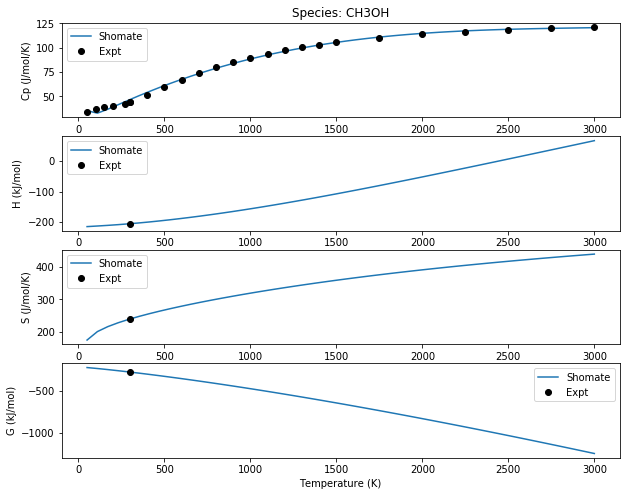

In [5]:
fig, axes = CH3OH_shomate.plot_empirical(Cp_units='J/mol/K', 
                                         H_units='kJ/mol', 
                                         S_units='J/mol/K', 
                                         G_units='kJ/mol')
# Add experimental data to plot
axes[0].plot(T, Cp, 'ko')
axes[1].plot(T_ref, H_ref, 'ko')
axes[2].plot(T_ref, S_ref, 'ko')
axes[3].plot(T_ref, H_ref - T_ref * S_ref * c.convert_unit(initial='J', final='kJ'), 'ko')

# Add legend to plot
axes[0].legend(['Shomate', 'Expt'])
axes[1].legend(['Shomate', 'Expt'])
axes[2].legend(['Shomate', 'Expt'])
axes[3].legend(['Shomate', 'Expt'])

# Adjust figure size so it's viewable
fig.set_size_inches((10, 8))

Note that in this code's section, we showcase the ``pmutt.constants.convert_unit`` function. Similarly to the ``c.R`` and ``c.T0`` functions shown above, this helps to increase code readability.

## Save the Shomate polynomial as a JSON file
If we would like to save our Shomate object, we can save it in JSON format with the help of the ``pmutt.io.json.pmuttEncoder``.

In [6]:
import json
from pmutt.io.json import pmuttEncoder

with open('CH3OH_shomate.json', 'w') as f_ptr:
    json.dump(CH3OH_shomate, f_ptr, cls=pmuttEncoder, indent=True)

This block will save the Shomate object to ``CH3OH_shomate.json``. Upon opening, the file will look like this:
```
{
 "class": "<class 'pmutt.empirical.shomate.Shomate'>",
 "type": "shomate",
 "name": "CH3OH",
 "phase": null,
 "elements": null,
 "notes": null,
 "smiles": null,
 "model": null,
 "misc_models": null,
 "a": [
  20.55906255664672,
  95.61493361898438,
  -31.306096062902366,
  3.5140598702327708,
  0.025109137759508435,
  -215.02560497018567,
  237.7737728103737,
  205.00000000000006
 ],
 "T_low": 50.0,
 "T_high": 3000.0
}
```

## Loading the Shomate polynomial from a JSON file
Now that we've saved the Shomate object, we can open it using ``pmutt.io.json.json_to_pmutt``.

In [7]:
from pmutt.io.json import json_to_pmutt

with open('CH3OH_shomate.json', 'r') as f_ptr:
    CH3OH_json = json.load(f_ptr, object_hook=json_to_pmutt)

print(CH3OH_json)